# Lab 4 - Instructions and problems
**Exponential and logarithmic functions**<br>
Software 2 - Mathematics Python Labs<br>
School of ICT<br>
Metropolia University of Applied Sciences

## Introduction

In this lab you practise to make graphs of applications of exponential functions and logarithmic scales. The first problem is an example from Timo Salin's mathematics lecture notes related to the Newton's law of cooling. 

In the second problem you study a historical data of development of semiconductors used in modern microprcessors and computers. First your aim is to create a graph how the  number of tranistors in microchips has developed over the last 50 years. Then your task is to estimate how many transistors there will be at year 2030. For that, you use the graphs.

Good luck!

## Setup

Add your name, change the student_id, and add date_returned. 

Import necessary libraries.

**Note**: For problem 2 you need to have the file `transistors.dat` in the same working folder as your Notebooks are. Remember to download it.

In [120]:
name = "Samnap Peo" # Write your name between parenthesis
student_id = 2514951 # Change your student ID here
date_returned = "03.11.2025" # Write the date returned between the parenthesis

import numpy as np
import matplotlib.pyplot as plt

# Test if data file for problem 2 is available
try:
    data = np.genfromtxt('transistors.dat', delimiter = '  ')
except OSError:
    print("transistors.dat not found. Please ensure the file is in the same directory as this script.") 

------------

## Problem 1

### Part a

The temperature of a hot cup of coffee decreases according to the formula (See Timo Salin's mathematics lecture notes):

$ T(t) = T_{env} + (T_0 - T_{env})\cdot e^{-kt} $

where,
- $T(t)$ is the temperature of the cup of coffee
- $T_{env}$ is the temperature of the environment
- $T_0$ is the initial temperature of the cup of coffee
- $k$ is the time constant
- $t$ is time

Sketch a graph of $T(t)$, with the given  $T_{env}$, $T_0$, and $k$. Use the time range from 0.0 to 180.0 s. Select the time step properly to show a smooth curve.

Annotate the graph (grid-lines, xlabel, ylabel, title).

Notice, that each of you get individual random initial values based on your student_id. See the given code in the problems for more details.

### Part b

When has the temperature fallen below 45 degrees? Find the answer graphically. 

Give the answer within 0.1 s accuracy.

In [121]:
# Initialize random number generator with student ID
rng = np.random.default_rng(student_id)
# Generate random time constant
k = rng.uniform(0.01, 0.05)
# Generate random initial temperature
T_0 = rng.uniform(80.0, 100.0)
T_env = 25.0 # Ambient temperature

print(f'Student ID: {student_id}')
print(f'k = {k:.3f} 1/s')
print(f'T_0 = {T_0:.1f} C')
print(f'T_env = {T_env:.1f} C')

Student ID: 2514951
k = 0.012 1/s
T_0 = 84.6 C
T_env = 25.0 C


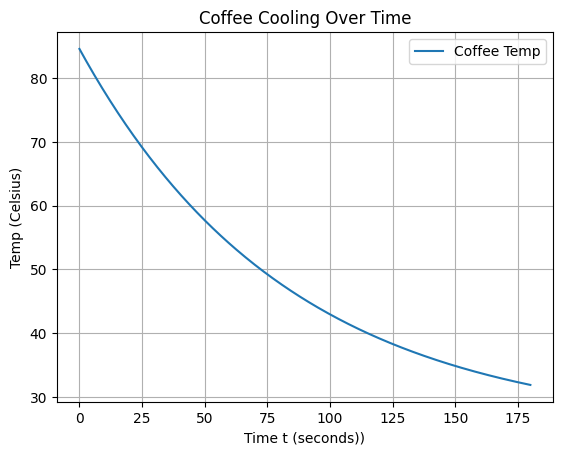

In [122]:
# Your code comes here
k = 0.012
T_0 = 84.6
T_env = 25.0
t = np.linspace(0.0, 180.0, 400)
T = T_env + (T_0 - T_env) * np.exp(-k * t)
plt.plot(t, T, label="Coffee Temp")
plt.grid(True)
plt.xlabel("Time t (seconds))")
plt.ylabel("Temp (Celsius)")
plt.title("Coffee Cooling Over Time")
plt.legend()
plt.show()

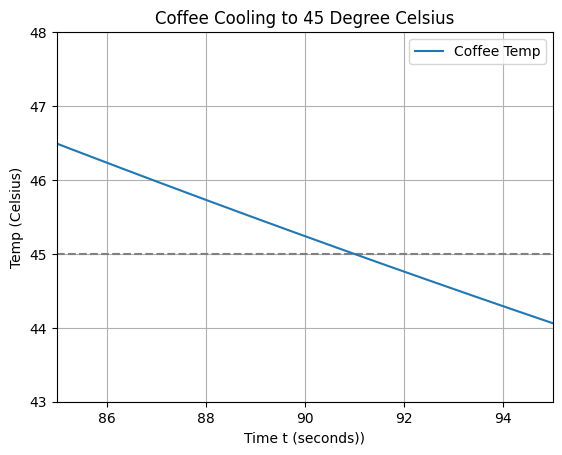

In [123]:
plt.axhline(45, color="gray", linestyle="--")
plt.plot(t, T, label="Coffee Temp")
plt.legend()
plt.grid(True)
plt.xlabel("Time t (seconds))")
plt.ylabel("Temp (Celsius)")
plt.title("Coffee Cooling to 45 Degree Celsius")
plt.ylim(43, 48)
plt.xlim(85, 95)
plt.show()

------
## Problem 2

In 1965, **[Gordon Moore](https://en.wikipedia.org/wiki/Gordon_Moore)** was asked by Electronics Magazine to predict what might happen in the semiconductor components over the next ten years. Moore observed that the numbers of components (transistors, etc.) in a dense integrated circuit had doubled approximately every year and speculated it would continue to do so for at least the next ten years. This forecast rate has been revised since then but the basic principle has continued over 50 years. 

Now it is your turn to make predictions. The cleaned data in file `transistors.dat` is downloaded from **[What is Moore's Law? - Our World in Data](https://ourworldindata.org/moores-law)**. The data can be read in to Notebook with the following code:
```python
# Notice, delimiter has two spaces!
data = np.genfromtxt('transistors.dat', delimiter = '  ') 
year = data[:, 0]
transistors = data[:, 1]
```

and then plotted in linear scale using the code:
```Python
# Scatter plot in linear scale
plt.figure(figsize=(6,4))
plt.scatter(year, transistors)
plt.xlabel('Year')
plt.ylabel('Number of transistors')
plt.grid()
``` 

Your task is to create a second graph of the data using semilogy scale, e.g. `plt.semilogy(year, transistors, 'o')`. The last 'o' changes the graph from line graph to scatter plot. Decorate also this graph.

Find by [trial and error](https://en.wikipedia.org/wiki/Trial_and_error) the exponential relationship between the transistors and years, e.g. $y(x) = be^{k(x - 1970)}$, where $x$ is the year, $k$ is the growth factor, $b$ is the offset (number of transistors at 1970), and $y$ is the estimate of the number of the transistors. Draw this estimate line in the same graph with the data, e.g. use `plt.semilogy(x, y)`. Use $x \in [1970, 2030]$. Change the xlimits and ylimits to make the graphics more readable.

Find the value of $y(2030)$. This is your prediction of the number of transistors in ICs at year 2030. **What is your prediction?** Give your estimation in scientific format with *three significant digits*  (=two decimals). For example, the following code:

```python
N = 12345678
print(f'N = {N:.2e}')
```
prints out:

`N = 1.23e+07`

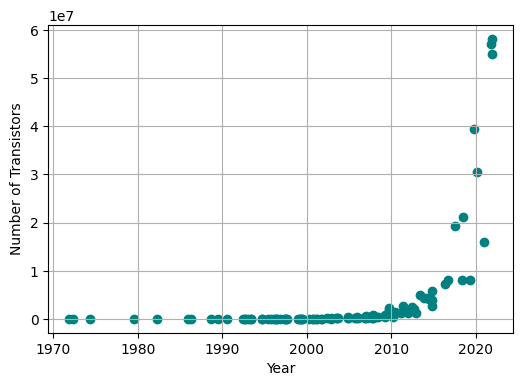

In [124]:
# Your code comes here
data = np.genfromtxt('transistors.dat', delimiter='  ')
year = data[:, 0]
transistors = data[:, 1]

plt.figure(figsize=(6, 4))
plt.scatter(year, transistors, color='teal')
plt.xlabel('Year')
plt.ylabel('Number of Transistors')
plt.grid(True)
plt.show()

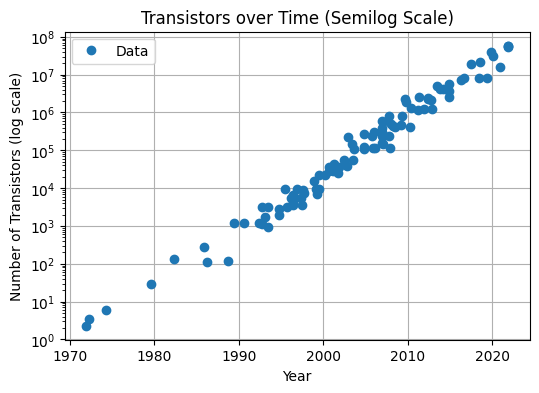

In [125]:
plt.figure(figsize=(6, 4))
plt.semilogy(year, transistors, 'o', label='Data')
plt.xlabel("Year")
plt.ylabel("Number of Transistors (log scale)")
plt.title("Transistors over Time (Semilog Scale)")
plt.grid(True)
plt.legend()
plt.show()

In [126]:
# Fit a line to ln(transistors)
coeffs = np.polyfit(year - 1970, np.log(transistors), 1)
k = coeffs[0]
ln_b = coeffs[1]
b = np.exp(ln_b) # note: undo-ing the logarithm

print(f"k = {k:.4f}")
print(f"b = {b:.4e}")


k = 0.3474
b = 7.1055e-01


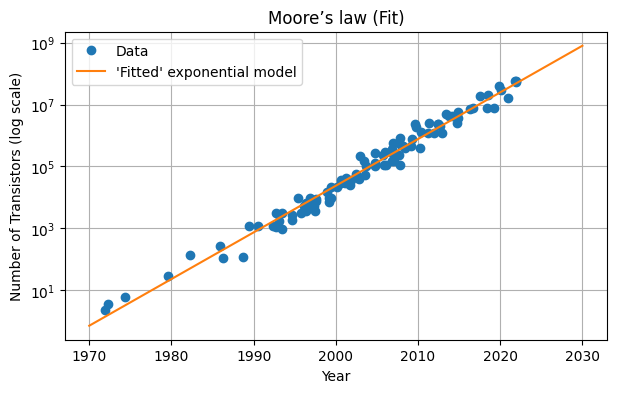

In [127]:
x_fit = np.linspace(1970, 2030, 200)
y_fit = b * np.exp(k * (x_fit - 1970))

plt.figure(figsize=(7, 4))
plt.semilogy(year, transistors, 'o', label='Data')
plt.semilogy(x_fit, y_fit, '-', label="'Fitted' exponential model")
plt.ylabel("Number of Transistors (log scale)")
plt.xlabel("Year")
plt.title("Moore’s law (Fit)")
plt.grid(True)
plt.legend()
plt.show()

In [128]:
y_2030 = b * np.exp(k * (2030 - 1970))
print(f"Prediction: number of transistors in 2030: {y_2030:.2e}")

Prediction: number of transistors in 2030: 8.04e+08


------
## Problem 3 (extra)

This is an extra problem. Solve it, if you want practise more. It is not mandatory.

### Part a

The voltage of a capacitor decays exponentially (See Software 1, Mathematics Lectures Period 1.pdf, page 27):

$ y(t) = \begin{cases} V_0,\; t<t_0\;\text{ms} \\ V_0 \cdot e^{-(t - t_0)/RC}, \; t \geq t_0\;\text{ms} \end{cases}$

Sketch the graph of the voltage of a capacitor in time-range from 0.0 ms to 10.0 ms (included) using timestep of 0.01 ms (Note: 1.0 ms = $1.0 \times 10^{3}$ s = 0.001 s). Use the following values in calculations:
- $V_0 = 5.0$ V
- $R = 1.2 \times 10^3 \;\Omega$ 
- $C = 1.0 \times 10^{-6}$ F
- $t_0 = 2.0 \times 10^{-3}$ s

Annotate the graph (xlabel, ylabel, title, and grid-lines). 

In [129]:
# Initial values
V0 = 5.0
R = 1.2e3
C = 1.0e-6
t0 = 2.0e-3

# Your code comes here


### Part b

Read from the graph when the voltage is dropped below 1.5 V. Give the answer within 0.1 ms accuracy. Create another graph, if needed, for more detailed analysis.

In [130]:
# Your code comes here